In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [ ]:
data = pd.read_csv(r'C:\Users\Lautaro\Downloads\16P.csv\16P.csv', encoding='latin1')


print(data.shape)
print(data.head())
print(data.columns)

(59999, 62)
   Response Id  You regularly make new friends.  \
0            0                                0   
1            1                                0   
2            2                                0   
3            3                                0   
4            4                                0   

   You spend a lot of your free time exploring various random topics that pique your interest  \
0                                                  0                                            
1                                                  0                                            
2                                                  0                                            
3                                                 -1                                            
4                                                  0                                            

   Seeing other people cry can easily make you feel like you want to cry too  \
0                 

In [ ]:

print(data.isnull().sum())


print(data.info())

Response Id                                                                                   0
You regularly make new friends.                                                               0
You spend a lot of your free time exploring various random topics that pique your interest    0
Seeing other people cry can easily make you feel like you want to cry too                     0
You often make a backup plan for a backup plan.                                               0
                                                                                             ..
You are very intrigued by things labeled as controversial.                                    0
You would pass along a good opportunity if you thought someone else needed it more.           0
You struggle with deadlines.                                                                  0
You feel confident that things will work out for you.                                         0
Personality                             

In [ ]:
X = data.iloc[:, 1:-1]  # Todas las columnas menos 'Response Id' y 'Personality'
y = data['Personality']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
print(classification_report(y_test, predictions))
print('Accuracy:', accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

        ENFJ       0.98      0.98      0.98       739
        ENFP       0.98      0.98      0.98       773
        ENTJ       0.97      0.99      0.98       738
        ENTP       0.98      0.98      0.98       748
        ESFJ       0.98      0.96      0.97       770
        ESFP       0.99      0.98      0.98       790
        ESTJ       0.97      0.98      0.97       739
        ESTP       0.98      0.99      0.98       773
        INFJ       0.97      0.96      0.97       775
        INFP       0.97      0.97      0.97       749
        INTJ       0.97      0.98      0.97       699
        INTP       0.96      0.98      0.97       744
        ISFJ       0.98      0.97      0.98       753
        ISFP       0.98      0.97      0.98       745
        ISTJ       0.97      0.97      0.97       740
        ISTP       0.98      0.98      0.98       725

    accuracy                           0.98     12000
   macro avg       0.98   

c:\Users\Lautaro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\tree\_export.py:670: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  ann.update_bbox_position_size(renderer)
c:\Users\Lautaro\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


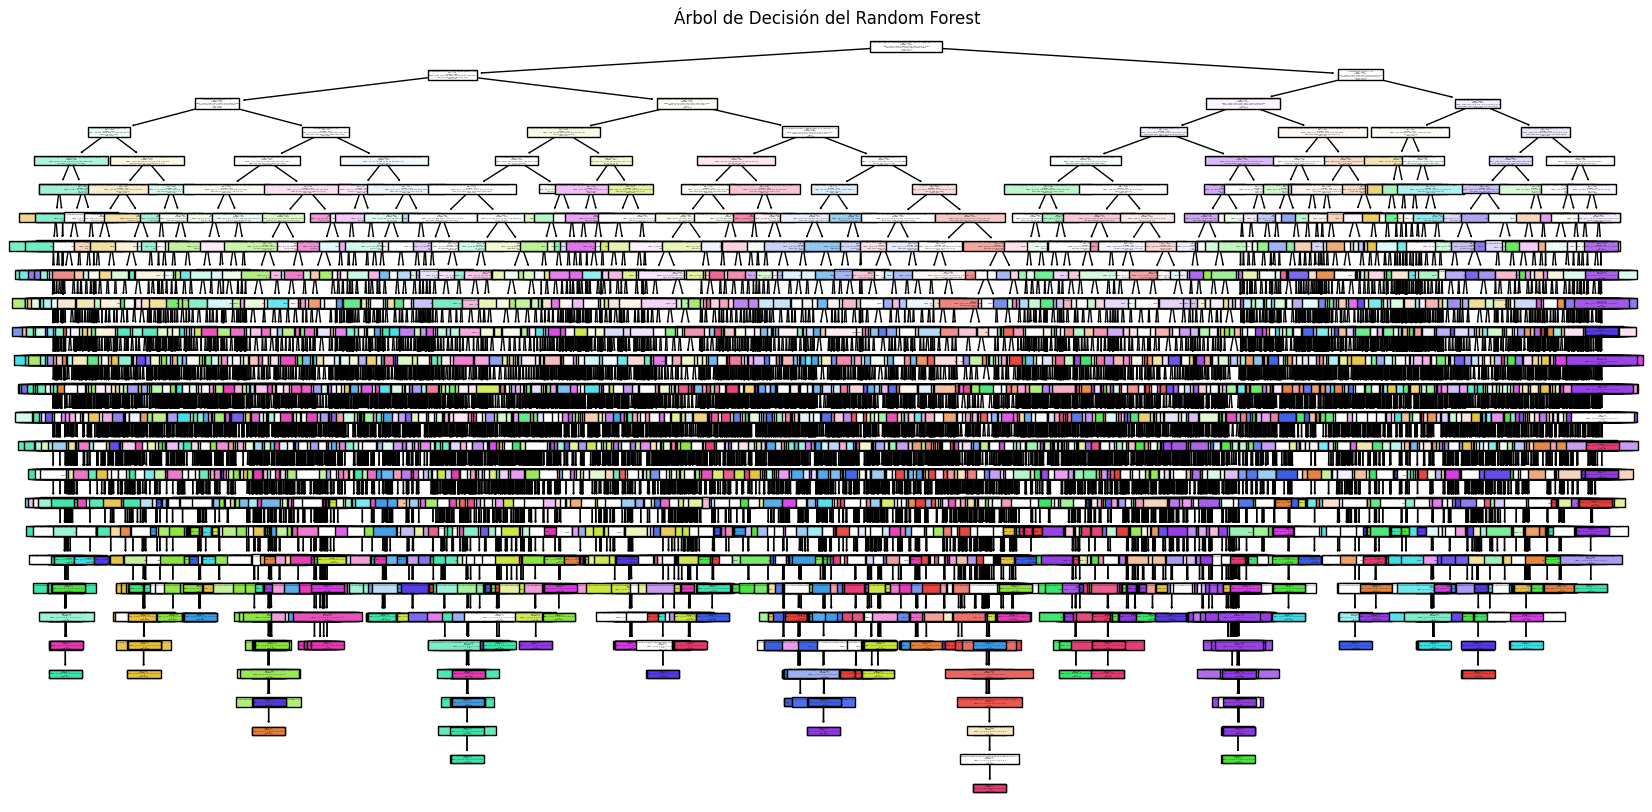

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(model.estimators_[0], filled=True, feature_names=X.columns, class_names=model.classes_)
plt.title('Árbol de Decisión del Random Forest')
plt.show()